<a href="https://colab.research.google.com/github/Sidqinabhan/Robotika/blob/main/Week%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving telu.png to telu (4).png


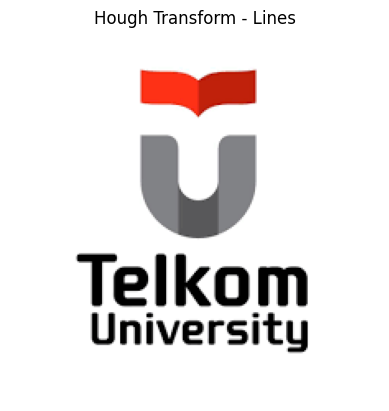

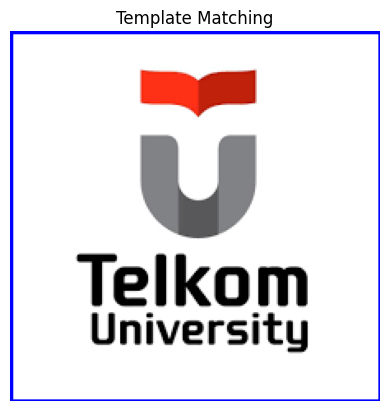

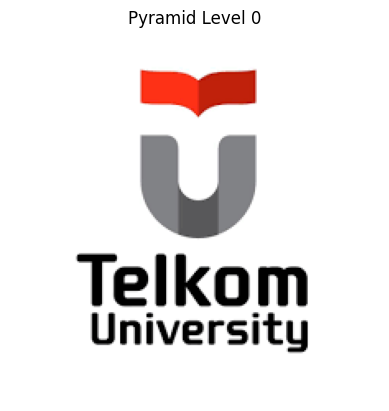

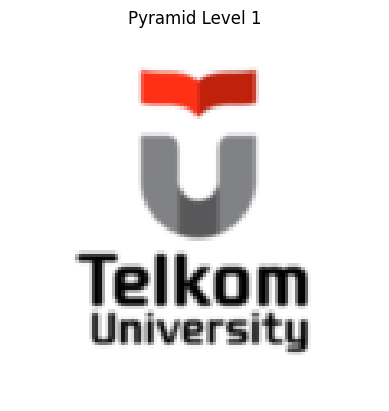

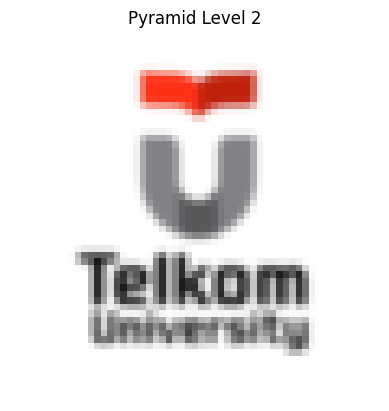

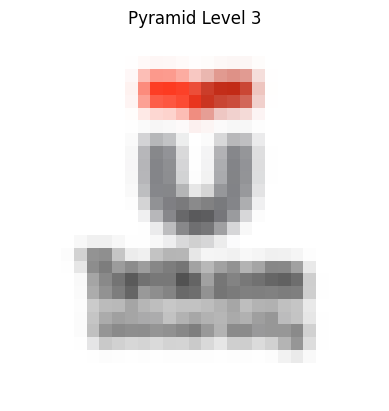

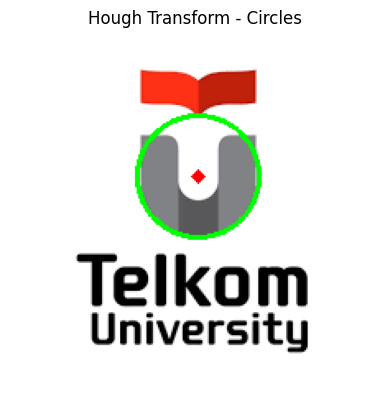

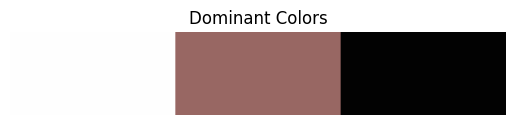

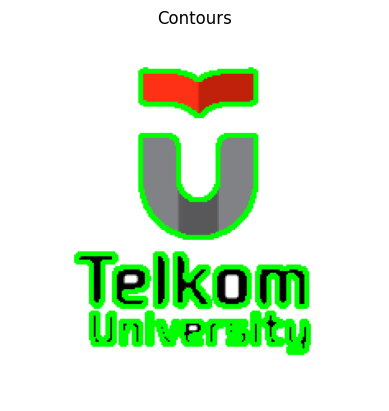

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files
uploaded = files.upload()

# Function to display images
def display_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to load an image safely
def load_image(path):
    image = cv2.imread(path)
    if image is None:
        raise FileNotFoundError(f"Image at path '{path}' not found.")
    return image

# Load a sample image
image_path = "telu.png"  # Replace with your image path
try:
    image = load_image(image_path)
except FileNotFoundError as e:
    print(e)
    image = None

# 1. Ekstraksi Garis dengan Hough Transform
def extract_lines_hough(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    result = image.copy()
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 2)

    display_image(result, "Hough Transform - Lines")

# 2. Template Matching untuk Deteksi Objek
def template_matching(image, template_path):
    try:
        template = load_image(template_path)
    except FileNotFoundError as e:
        print(e)
        return

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    res = cv2.matchTemplate(gray, template_gray, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    h, w = template_gray.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    result = image.copy()
    cv2.rectangle(result, top_left, bottom_right, (255, 0, 0), 2)

    display_image(result, "Template Matching")

# 3. Pembuatan Pyramid Gambar
def create_image_pyramid(image):
    pyramid = [image]
    for i in range(3):
        image = cv2.pyrDown(image)
        pyramid.append(image)

    for i, level in enumerate(pyramid):
        display_image(level, f"Pyramid Level {i}")

# 4. Deteksi Lingkaran Menggunakan Hough Transform
def detect_circles_hough(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
                               param1=50, param2=30, minRadius=0, maxRadius=0)

    result = image.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(result, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(result, (i[0], i[1]), 2, (0, 0, 255), 3)

    display_image(result, "Hough Transform - Circles")

# 5. Ekstraksi Warna Dominan pada Gambar
def extract_dominant_color(image, k=3):
    data = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    dominant_colors = np.array(kmeans.cluster_centers_, dtype='uint8')

    bar = np.zeros((50, 300, 3), dtype='uint8')
    steps = 300 // k
    for i, color in enumerate(dominant_colors):
        bar[:, i * steps:(i + 1) * steps, :] = color

    display_image(bar, "Dominant Colors")

# 6. Deteksi Kontur pada Gambar
def detect_contours(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    result = image.copy()
    cv2.drawContours(result, contours, -1, (0, 255, 0), 2)

    display_image(result, "Contours")

#  panggil fungsi jika gambar sudah di loaded
if image is not None:
    extract_lines_hough(image)
    template_matching(image, "telu.png")
    create_image_pyramid(image)
    detect_circles_hough(image)
    extract_dominant_color(image)
    detect_contours(image)
